### Note: This code is built on the code written by Nicholas Renotte in his video tutorial titled "Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects".

### Link to the video: https://www.youtube.com/watch?v=yqkISICHH-U

# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_fpnlite_640' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget

In [6]:
import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
error: avro-python3 1.10.2 is installed but avro-python3!=1.9.2,<1.10.0,>=1.8.1 is required by {'apache-beam'}



byte-compiling build\bdist.win-amd64\egg\object_detection\builders\region_similarity_calculator_builder_test.py to region_similarity_calculator_builder_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\builders\target_assigner_builder.py to target_assigner_builder.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\builders\target_assigner_builder_test.py to target_assigner_builder_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\builders\__init__.py to __init__.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\core\anchor_generator.py to anchor_generator.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\core\balanced_positive_negative_sampler.py to balanced_positive_negative_sampler.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\core\balanced_positive_negative_sampler_test.py to balanced_positive_negative_sampler_test.cpython-38.pyc
byt

Obtaining file:///C:/Users/MNasser/Desktop/Object%20Detection%20Course/Project/TODCourse/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-06-04 05:52:30.180717: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.8.8: C:\Users\MNasser\Desktop\Object Detection Course\Project\TODCourse\TFODCourse\tfodd\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-04 05:52:33.489090: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-06-04 05:52:33.534224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.83GHz coreCount: 48 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 462.00GiB/s
2021-06-04 05:52:33.534253: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-04 05:52:33.543329: I tensorflow/stream_executor/platform/default/ds

In [45]:
print(VERIFICATION_SCRIPT)

Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py


In [11]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
!pip install Pillow

In [ ]:
!pip install pyyaml

In [7]:
import object_detection

In [11]:
!pip list

Package                       Version             Location
----------------------------- ------------------- -------------------------------------------------------------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.30.0rc1
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    4.2.2
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
crcmod                        1.7
cycler                        0.10.0
Cython                        0.29.23
decorator                     5.0.9
dill                          0.3.1.1
fastavro                      1.4.1
flatbuffers                   1.12
future                        0.18.2
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.6.0
google

In [8]:
#This chunk downloads the model from tf zoo
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [....................................................................] 1426099846 / 1426099846        1 file(s) moved.


x centernet_hg104_512x512_coco17_tpu-8/
x centernet_hg104_512x512_coco17_tpu-8/checkpoint/
x centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x centernet_hg104_512x512_coco17_tpu-8/checkpoint/checkpoint
x centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.index
x centernet_hg104_512x512_coco17_tpu-8/pipeline.config
x centernet_hg104_512x512_coco17_tpu-8/saved_model/
x centernet_hg104_512x512_coco17_tpu-8/saved_model/saved_model.pb
x centernet_hg104_512x512_coco17_tpu-8/saved_model/assets/
x centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/
x centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [8]:
labels = [{'name':'Car', 'id':1}, {'name':'Motorcycle', 'id':2}, {'name':'TukTuk', 'id':3}, {'name':'Bus', 'id':4}, {'name':'Truck', 'id':5}]

In [9]:
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [15]:
!pip install pytz

In [10]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [11]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [13]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [14]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': center_net {
   num_classes: 90
   feature_extractor {
     type: "hourglass_104"
     channel_means: 104.01362
     channel_means: 114.034225
     channel_means: 119.916595
     channel_stds: 73.60277
     channel_stds: 69.89082
     channel_stds: 70.91508
     bgr_ordering: true
   }
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 512
       max_dimension: 512
       pad_to_max_dimension: true
     }
   }
   object_detection_task {
     task_loss_weight: 1.0
     offset_loss_weight: 1.0
     scale_loss_weight: 0.1
     localization_loss {
       l1_localization_loss {
       }
     }
   }
   object_center_params {
     object_center_loss_weight: 1.0
     classification_loss {
       penalty_reduced_logistic_focal_loss {
         alpha: 2.0
         beta: 4.0
       }
     }
     min_box_overlap_iou: 0.7
     max_box_predictions: 100
   }
 },
 'train_config': batch_size: 128
 data_augmentation_options {
   random_horizontal_flip {
   }
 }
 data_augm

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [20]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [21]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=100000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [22]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_centernet_hg104_512 --pipeline_config_path=Tensorflow\workspace\models\my_centernet_hg104_512\pipeline.config --num_train_steps=100000


In [ ]:
!{command}

In [14]:
### Installing for GPU

In [15]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0

  Using cached tensorflow_gpu-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\mnasser\\desktop\\object detection course\\project\\todcourse\\tfodcourse\\tfodd\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Check the permissions.



In [ ]:
# tensorboard --logdir=.

# 7. Evaluate the Model

In [21]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [22]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_fpnlite_640 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_fpnlite_640\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_fpnlite_640


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [12]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [13]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-28')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
print(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6'))

# 9. Detect from an Image

In [14]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import uuid
%matplotlib inline

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [16]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'traffic.03cde635-c2fc-11eb-af26-b42e99a77026.jpg')

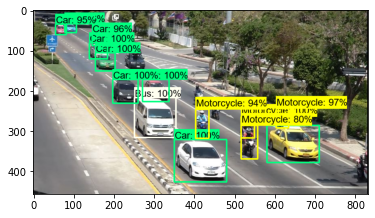

In [17]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=40,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}